In [1]:
import numpy
import math
from matplotlib import pyplot

In [2]:
N = 200                               # Number of points in each direction
x_start, x_end = -4.0, 4.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

In [3]:
u_inf = 1.0        # freestream speed

# computes the freestream velocity field
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# computes the stream-function
psi_freestream = u_inf * Y

In [4]:
def get_velocity(strength, xs, ys, X, Y):
    """Returns the velocity field generated by a source/sink.
    
    Arguments
    ---------
    strength -- strength of the source/sink.
    xs, ys -- coordinates of the source/sink.
    X, Y -- mesh grid.
    """
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [5]:
def get_stream_function(strength, xs, ys, X, Y):
    """Returns the stream-function generated by a source/sink.
    
    Arguments
    ---------
    strength -- strength of the source/sink.
    xs, ys -- coordinates of the source/sink.
    X, Y -- mesh grid.
    """
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [6]:
strength_source = 5.0            # strength of the source
x_source, y_source = -1.0, 0.0   # location of the source

# computes the velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# computes the stream-function
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

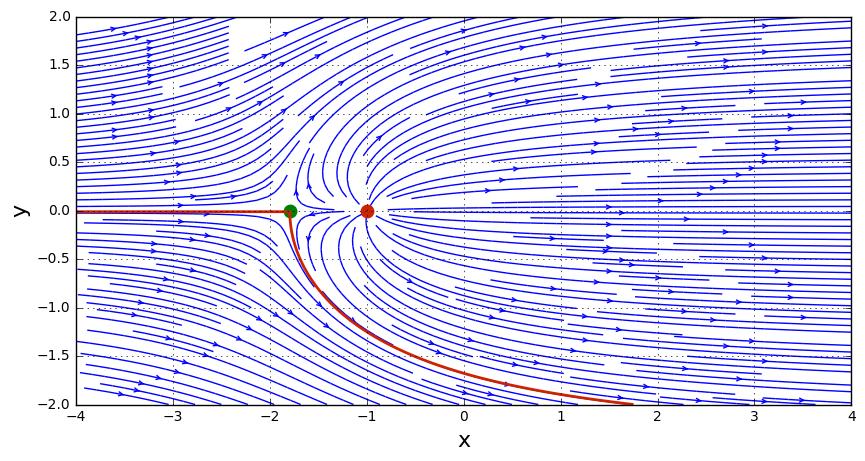

In [10]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

%matplotlib inline

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculates the stagnation point
x_stagnation = x_source - strength_source/(2*numpy.pi*u_inf)
y_stagnation = y_source

# adding the stagnation point to the figure
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# adds the dividing line to the figure
pyplot.contour(X, Y, psi, 
            levels=[ -+strength_source/2], 
            colors='#CD2305', linewidths=2, linestyles='solid');

In [11]:
strength_sink = -5.0        # strength of the sink
x_sink, y_sink = 1.0, 0.0   # location of the sink

# computes the velocity field on the mesh grid
u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

# computes the stream-function on the grid mesh
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

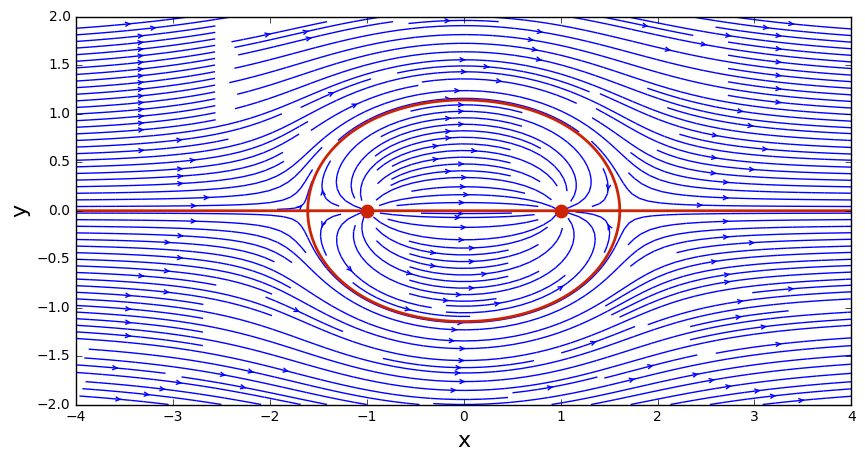

In [18]:
# superposition of a source and a sink on the freestream
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

# plots the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,levels=[0.] , colors='#CD2305', linewidths=2, linestyles='solid');

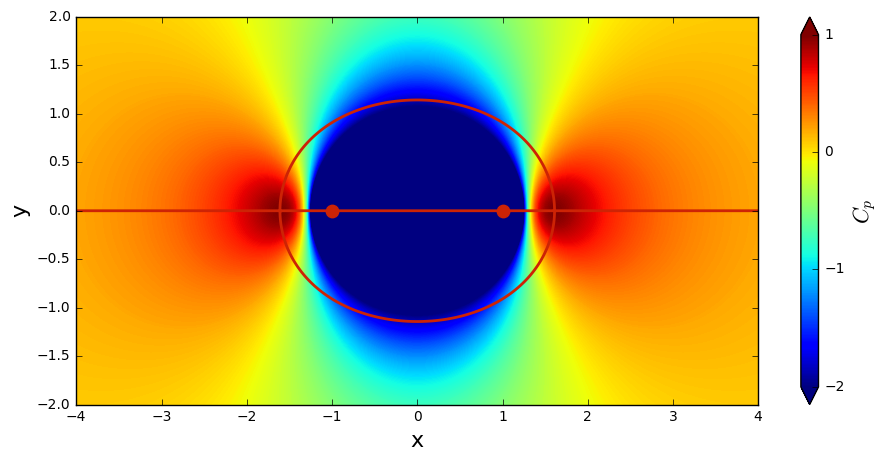

In [32]:
# computes the pressure coefficient field
cp = 1.0 - (u**2+v**2)/u_inf**2

# plots the pressure coefficient field
size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.,1.,500), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');